In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras 
from tensorflow.keras import layers


In [3]:
! pip install numpy 

Defaulting to user installation because normal site-packages is not writeable


In [4]:
! pip install pandas 

Defaulting to user installation because normal site-packages is not writeable


In [5]:
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [1]:
! pip install tensorflow

In [52]:
data_train_path = r'C:\Users\ABHINAV KUMAR\Desktop\Image Classification\Fruits_Vegetables\train'
data_test_path = r'C:\Users\ABHINAV KUMAR\Desktop\Image Classification\Fruits_Vegetables\test'
data_val_path = r'C:\Users\ABHINAV KUMAR\Desktop\Image Classification\Fruits_Vegetables\validation'

In [53]:
img_width=180
img_height=180

In [54]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [55]:
data_cat=data_train.class_names

In [56]:
data_val =tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_width, img_height), 
    batch_size=32,
    validation_split=False,
    shuffle=False)

Found 351 files belonging to 36 classes.


In [57]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False,
    shuffle=False)

Found 359 files belonging to 36 classes.


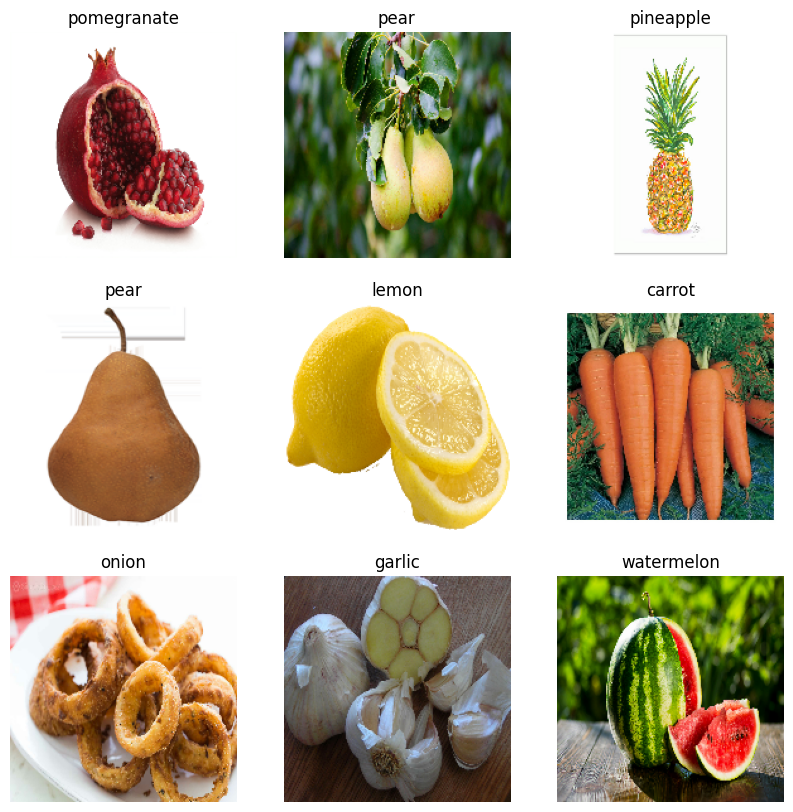

In [37]:
plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [58]:
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_width, img_height, 3)),
    
    # First Conv Block
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    # Second Conv Block
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    # Third Conv Block
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    # Fourth Conv Block
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(len(data_cat), activation='softmax')
])

In [60]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
epochs = 15

# Add callbacks for better training
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-7
)

history = model.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/25
60/98 ━━━━━━━━━━━━━━━━━━━━ 6:58 11s/step - accuracy: 0.0346 - loss: 4.8072

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,993,284 (15.23 MB)

 Trainable params: 3,993,284 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

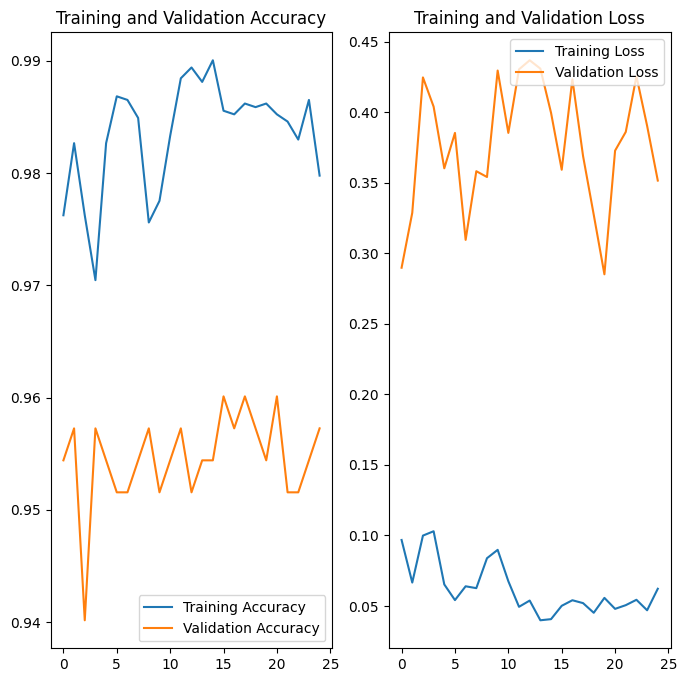

In [44]:
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
image = 'Banana.jpg'
image = keras.utils.load_img(
    image, target_size=(img_width, img_height)
)
img_arr = tf.keras.utils.img_to_array(image)
img_bat = tf.expand_dims(img_arr, 0)  # Create a batch

In [46]:
predict = model.predict(img_bat)
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


array([[0.02816159, 0.0288967 , 0.02891453, 0.02809054, 0.02476057,
        0.02446918, 0.03325664, 0.02018602, 0.02214845, 0.02280546,
        0.02862025, 0.03644774, 0.02823337, 0.02446144, 0.02835809,
        0.03408737, 0.02967641, 0.0235027 , 0.02946571, 0.03018524,
        0.0319142 , 0.03009074, 0.0335354 , 0.02525626, 0.0253115 ,
        0.02468259, 0.02384448, 0.03370084, 0.02448588, 0.02334725,
        0.03209981, 0.02789015, 0.02702241, 0.02645537, 0.02655959,
        0.02907557]], dtype=float32)

In [47]:
score = tf.nn.softmax(predict)

In [48]:
print('Veg/Fruit in image is {} with accuracy of {:.2f}%'.format(data_cat[np.argmax(score)], np.max(score)*100))

Veg/Fruit in image is eggplant with accuracy of 2.80%


In [50]:
model.save('Image_classify.keras')